In [1]:
import pandas as pd

### 데이터 확인

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 구조

- PassengerId : 승객 id, 1부터 시작하는 인덱스 번호
- Survived : 생존여부.0 - 사망, 1 - 생존
- Pclass : 티켓등급 1 - 1등석, 2 - 2등석, 3 - 3등석
- Name : 승객이름
- Sex : 성별, male : 남성, female: 여성
- Age : 나이
- SibSp : 동승한 형제 자매 수
- Parch : 동승한 부모 자식의 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실번호
- Embarked : 탑승한 선착장, C - Cherbourg, Q - Queenstown, S - Southampton

In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# 행열의 수
train_df.shape

(891, 12)

In [6]:
test_df.shape # survived 가 없기 때문에 열이 하나 적게 나옴

(418, 11)

In [7]:
# 데이터 프레임 전체 정보
train_df.info() # 결측치가 어디에 있는지 꼭 확인하기.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# 결측치 확인
# sum : 각 컬럼별 총합
train_df.isnull().sum() #False: 0, True: 1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Pclass (티켓 등급)

In [11]:
import matplotlib.pyplot as plt

# 시각화 함수
def bar_chart(feature):
    # 특성에 따라 생존자 수를 구한다.
    survived_df = train_df[train_df['Survived']==1][feature] # [행][열] 이 안에 True나 False 값 넣어주면 나머지 날려버림
    survived = survived_df.value_counts()
    
    dead_df = train_df[train_df['Survived'] == 0][feature]
    dead = dead_df.value_counts()
    
    # 시각화를 위해 데이터프레임을 생성한다.
    df = pd.DataFrame([survived, dead])
    # 인덱스
    df.index = ['Survived', 'Dead']
    # 그린다
    df.plot(kind='bar', figsize=(10, 5))
    
    
# 결측치, 최대, 최소 수 확인
def show_info(feature) :
    print(f"결측치 수 : {train_df[feature].isnull().sum()}")
    print(f"최대 수 : {train_df[feature].max()}")
    print(f"최소 수 : {train_df[feature].min()}")
    print(train_df[feature].value_counts())
    print(train_df[feature].drop_duplicates().values)

In [12]:
show_info('Pclass')

결측치 수 : 0
최대 수 : 3
최소 수 : 1
3    491
1    216
2    184
Name: Pclass, dtype: int64
[3 1 2]


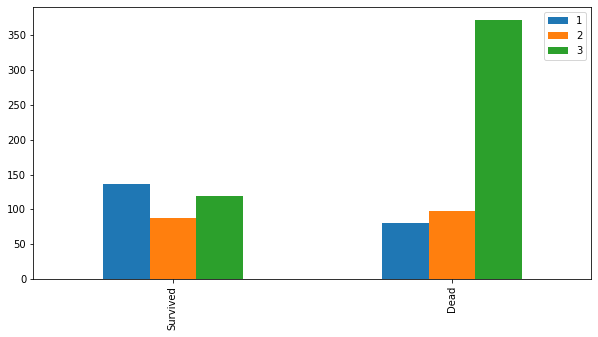

In [13]:
bar_chart('Pclass')

Pclass 그래프의 결과 :3등석일수록 사망할 확륭이 높다.

결측치 수가 0 이고 스케일이 크지 않기 때문에 전처리는 하지 않는다.

### Sex (성별)

In [14]:
show_info ('Sex')

결측치 수 : 0
최대 수 : male
최소 수 : female
male      577
female    314
Name: Sex, dtype: int64
['male' 'female']


결측치가 존재하지 않는다. 값이 문자열로 되어 있기 때문에 숫자 변환하는 전처리가 필요하다.

남자를 0, 여자를 1로 변경한다.

In [15]:
sex_mapping = {
    'male' : 0,
    'female' : 1,
}

train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

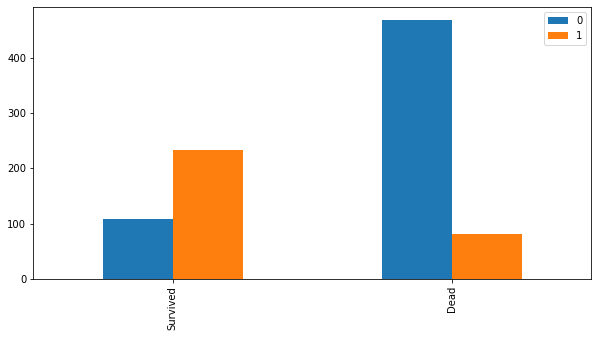

In [16]:
bar_chart('Sex')

Sex 그래프 결과 : 남자가 여자보다 사망할 확률이 높다

### Age (나이)

In [17]:
show_info('Age')

결측치 수 : 177
최대 수 : 80.0
최소 수 : 0.42
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


결측치가 177개이고 스케일도 크다.

Name 특성에 있는 중간 이름을 통해 나이를 추정하도록 한다.

In [18]:
# 정규표현식을 써보자
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [19]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Lady          1
Sir           1
Capt          1
Countess      1
Ms            1
Don           1
Mme           1
Name: Title, dtype: int64

In [20]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [21]:
title_map = {
    'Mr' : 0,
'Miss': 1,
'Mrs' : 2, 
'Master' : 3,
'Dr' : 4, 
'Rev' : 4,
'Col' : 4,
'Mlle' : 4,
'Major' : 4,
'Don' : 4,
'Capt' : 4,
'Mme' : 4,
'Sir' : 4,
'Ms' : 4,
'Lady' : 4,
'Countess': 4,
'Jonkheer': 4,
    'Dona' : 4 }


train_df['Title'] = train_df['Title'].map(title_map)
test_df['Title'] = test_df['Title'].map(title_map)

In [22]:
train_df['Title'].value_counts()

0    517
1    182
2    125
3     40
4     27
Name: Title, dtype: int64

In [23]:
test_df['Title'].value_counts()

0    240
1     78
2     72
3     21
4      7
Name: Title, dtype: int64

title 별 나이 중간값을 결측치로 채워준다.

In [24]:
train_df['Age'].fillna(train_df.groupby('Title')['Age'].transform('median'), inplace=True)
test_df['Age'].fillna(test_df.groupby('Title')['Age'].transform('median'), inplace=True)

In [25]:
train_df['Age'].isnull().sum()

0

In [26]:
test_df['Age'].isnull().sum()

0

결측치가 0이라는 것을 알 수 있다.

나이값 조정 (scale 조정) ->
- 0 ~ 18 : 0
- 19 ~ 25 : 1
- 26 ~ 35 : 2
- 36 ~ 50 : 3
- 50 < x : 4

In [27]:
train_df.loc[train_df['Age'] <= 18, 'Age'] = 0
train_df.loc[(train_df['Age'] > 18) & (train_df['Age'] <= 25) , 'Age'] = 1
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 35) , 'Age'] = 2
train_df.loc[(train_df['Age'] > 35) & (train_df['Age'] <= 50) , 'Age'] = 3
train_df.loc[train_df['Age'] > 50 , 'Age'] = 4

In [28]:
test_df.loc[test_df['Age'] <= 18, 'Age'] = 0 # (True 아님 False 로 된다.) 트루에 해당하는 로우만 가져온다. 나머지는 0으로 채워준다.
test_df.loc[(test_df['Age'] > 18) & (test_df['Age'] <= 25), 'Age' ] = 1
test_df.loc[(test_df['Age'] > 25) & (test_df['Age'] <= 35), 'Age' ] = 2
test_df.loc[(test_df['Age'] > 35) & (test_df['Age'] <= 50), 'Age' ] = 3
test_df.loc[(test_df['Age'] > 50), 'Age' ] = 4

In [29]:
train_df['Age'].value_counts()

2.0    332
1.0    198
3.0    154
0.0    143
4.0     64
Name: Age, dtype: int64

In [30]:
test_df['Age'].value_counts()

2.0    142
1.0    102
3.0     85
0.0     58
4.0     31
Name: Age, dtype: int64

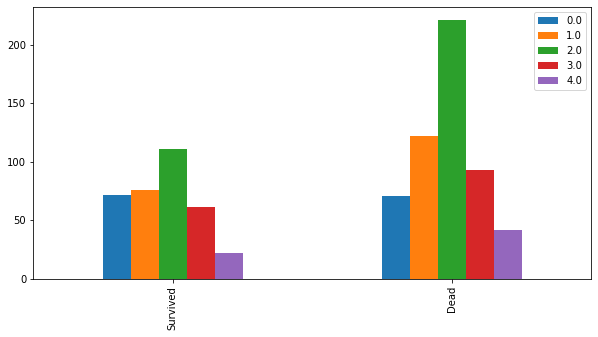

In [31]:
bar_chart('Age')

18 이하인 경우 생존확률이 높지만 그 이상이면 사망확률이 높아진다.

### SibSp(동승한 형제자매수), Parch(동승한 부모 자식의 수)
여기에서는 이 두 데이터와 본인의 수를 합쳐 가족수를 구하도록 하겠다.

In [32]:
show_info('SibSp')

결측치 수 : 0
최대 수 : 8
최소 수 : 0
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
[1 0 3 4 2 5 8]


In [33]:
show_info('Parch')

결측치 수 : 0
최대 수 : 6
최소 수 : 0
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
[0 1 2 5 3 4 6]


결측치는 없고 가족수로 합햅을 때 스케일이 클 가능성이 있다.

In [34]:
# 가족수를 계산해서 추가한다.
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [35]:
train_df['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [36]:
test_df['FamilySize'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [37]:
family_map = {
    1:0,
    2:0.4,
    3:0.8,
    4:1.2,
    5:1.6,
    6:2.0,
    7:2.4,
    8:2.8,
    9:3.2,
    10:3.6,
    11:4.0 }

train_df['FamilySize'] = train_df['FamilySize'].map(family_map)
test_df['FamilySize'] = test_df['FamilySize'].map(family_map)


In [38]:
train_df['FamilySize'].value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
4.0      7
2.8      6
Name: FamilySize, dtype: int64

In [39]:
test_df['FamilySize'].value_counts()

0.0    253
0.4     74
0.8     57
1.2     14
1.6      7
2.4      4
4.0      4
2.0      3
2.8      2
Name: FamilySize, dtype: int64

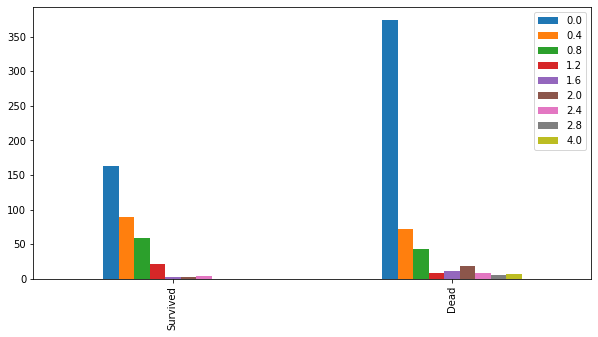

In [40]:
bar_chart('FamilySize')

위 그래프의 결과 : 혼자 탈수록 사망할 확률이 높다.

### Fare(요금)

In [41]:
print(train_df['Fare'].isnull().sum())
print(test_df['Fare'].isnull().sum())

0
1


In [42]:
show_info('Fare')

결측치 수 : 0
최대 수 : 512.3292
최소 수 : 0.0
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5 

In [43]:
# 각 등급별 요급 구간을 출력해본다.
print(train_df[(train_df['Pclass']== 1)]['Fare'].max())
print(train_df[(train_df['Pclass']== 1) & (train_df['Fare'] > 0)]['Fare'].min())

print(train_df[(train_df['Pclass']== 2)]['Fare'].max())
print(train_df[(train_df['Pclass']== 2) & (train_df['Fare'] > 0)]['Fare'].min())
                                                     
print(train_df[(train_df['Pclass']== 3)]['Fare'].max())
print(train_df[(train_df['Pclass']== 3) & (train_df['Fare'] > 0)]['Fare'].min())

512.3292
5.0
73.5
10.5
69.55
4.0125


요금은 객실 등급과 나이와 관련이 있고 값이 너무 다양하기 때문에 제외한다.

### 불필요한 특성을 제거

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
 13  FamilySize   891 non-null    float64
dtypes: float64(3), int64(7), object(4)
memory usage: 97.6+ KB


In [45]:
# 제거 대상 특성의 이름
drop_list = ['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

train_df = train_df.drop(drop_list, axis = 1) # 열로 제거
test_df = test_df.drop(drop_list, axis = 1) # 열로 제거

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Title        891 non-null    int64  
 6   FamilySize   891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Title        418 non-null    int64  
 5   FamilySize   418 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


### 저장

In [48]:
train_df.to_csv('train_new.csv', index=False)
test_df.to_csv('test_new.csv', index=False)
print('저장완료')


저장완료
